In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
%matplotlib inline


In [3]:
iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [4]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
x = iris.drop('variety', axis=1)
y = iris['variety']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0)


In [8]:
clf = DecisionTreeClassifier()

path = clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0, 0.5, 'total impurity of leaves')

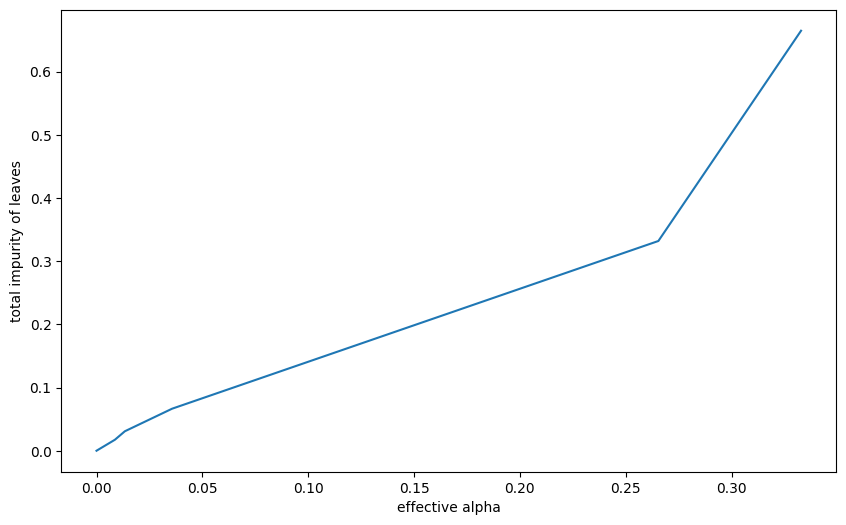

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")


In [10]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)


Text(0, 0.5, 'total depth')

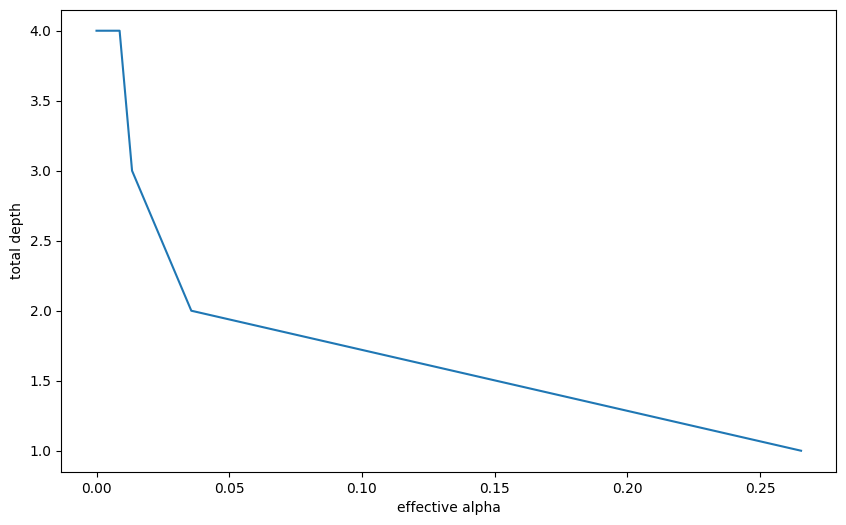

In [11]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

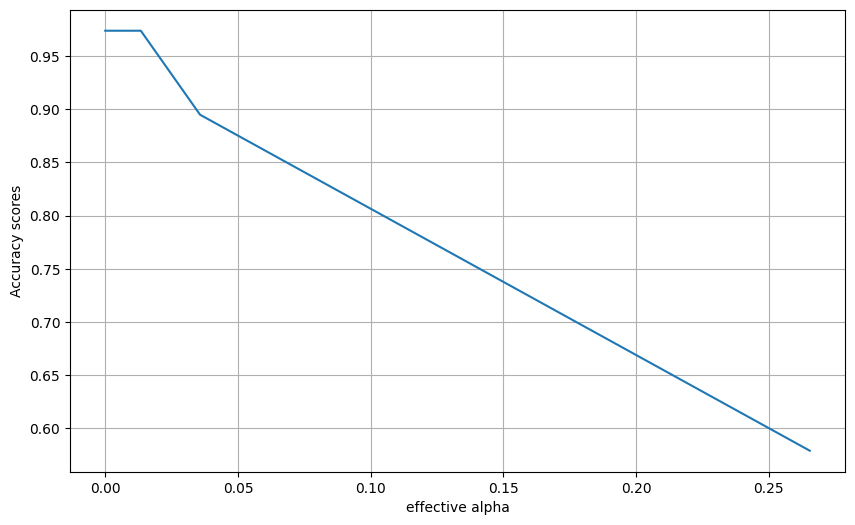

In [14]:
acc_scores = [accuracy_score(y_test, clf.predict(x_test)) for clf in clfs]
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")


In [15]:
model = DecisionTreeClassifier(ccp_alpha=0.01,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [16]:
y_pred = model.predict(x_test)

In [17]:
print(accuracy_score(y_test, y_pred))


0.9736842105263158


In [21]:
model = DecisionTreeClassifier(ccp_alpha=0.04,random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.8947368421052632
